# Graph Generation

First, We gonna build the graph for our problem as the constraint adding left the modelisation mostly similar we will use one graph for all :

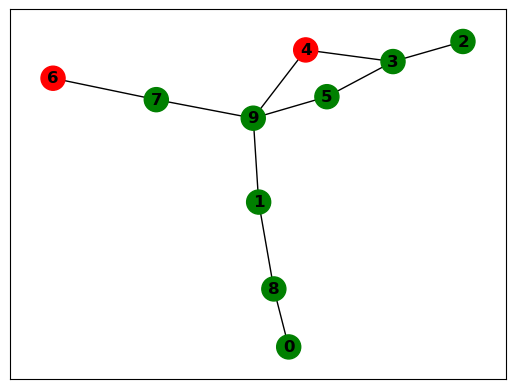

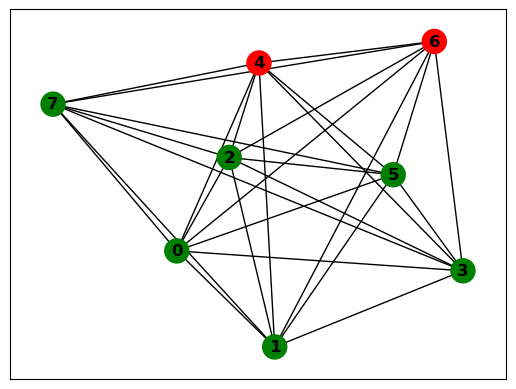

In [1]:
from AlgoAV.Generation.GraphGen import GraphGen , WeigthSetFixed, ObjectAttribution
from AlgoAV.Modelisation.FullGraph import SetFullGraph
from AlgoAV.Presentation.L2Init.Processing.FourmiOpti import FourmiOpti as LIFourmiOpti
from AlgoAV.Presentation.L2nd.Processing.FourmiOpti import FourmiOpti as L2FourmiOpti
from AlgoAV.Presentation.L2st.Processing.FourmiOpti import FourmiOpti as L1FourmiOpti
from AlgoAV.Display.DisplayGraph import DisplayGraph
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
import random
import time
import math
import copy
from time import process_time

nb_Cities = 10
CityProportion = 0.5
maxWeigth = 5
Evap = 0.25
Alpha = 5
Beta = 0.5
Deposit = 90
StartValueDeposit = 90
MaxTime = 10

seed = None
random.seed()


startingVertice = random.choice(range(nb_Cities))
ListDeliveries = random.choices(range(nb_Cities),k=math.ceil(nb_Cities*CityProportion))#list(range(nb_Cities))
ListDeliveries.append(startingVertice)


ListDeliverieInt = tuple(np.unique(ListDeliveries).tolist())
ListDeliverieTreated, ObjectGetPoint = ObjectAttribution(startingVertice,ListDeliverieInt,nb_Cities)
CityTotreat = len(ListDeliverieTreated)

Graph = GraphGen(nb_Cities)


WGraph = WeigthSetFixed(Graph,nb_Cities,seed,maxWeigth,MaxTime)
DisplayGraph(WGraph[0],DisplayWeigth=False,FrontNode=ListDeliverieTreated)

EquivArray, WFullGraph = SetFullGraph(ListDeliverieTreated,nb_Cities,WGraph,MaxTime)
DisplayGraph(WFullGraph[0],DisplayWeigth=False,FrontNode=ListDeliverieTreated)


startingVertice = ListDeliverieTreated.index(startingVertice)
UpdatedObjectGetPoint = [ ListDeliverieTreated.index(i) for i in ObjectGetPoint ]

IterationUsed = math.ceil(CityTotreat/4)
ColonySize = math.ceil(CityTotreat/2)



## Initial Problem

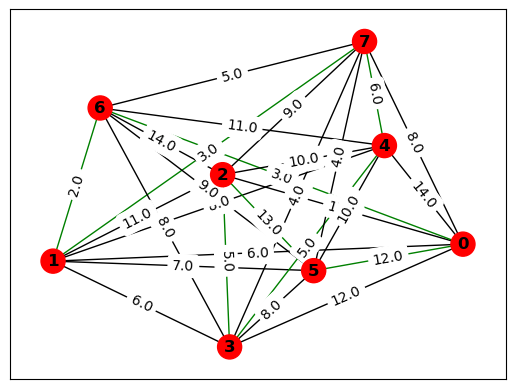

2->3->7->9->1->0->8->1->9->5->3->2->

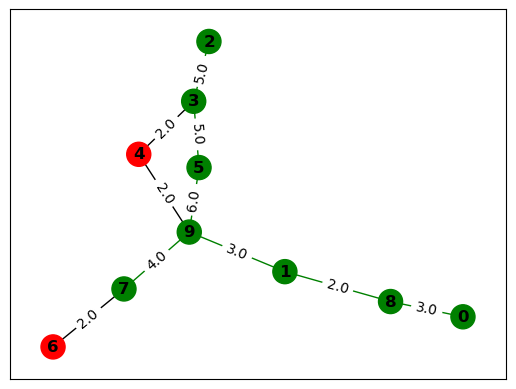

Execution time : 0.265625


In [2]:
start = time.process_time()
MinWeigth, BestPath = \
LIFourmiOpti( WFullGraph[0],
            CityTotreat,
            Evap,
            Alpha,
            Beta,
            IterationUsed,
            Deposit,
            startingVertice,
            ColonySize,
            StartValueDeposit
            )
PathTreated = []
OptimalPath = deque()
for i in range(len(BestPath)-1):
    PathTreated.append((BestPath[i],BestPath[i+1],))
    PathTreated.append((BestPath[i+1],BestPath[i],))

DisplayGraph(WFullGraph[0],DisplayWeigth=True,FrontPath=PathTreated)

StartValue = BestPath.popleft()
EndValue = BestPath.popleft()
while(len(BestPath)>0):
    Equiv = copy.deepcopy(EquivArray[0][StartValue][EndValue])
    while(len(Equiv)>1):
        OptimalPath.append(Equiv.popleft())
    StartValue = EndValue
    EndValue = BestPath.popleft()
Equiv = copy.deepcopy(EquivArray[0][StartValue][EndValue])
while(len(Equiv)>0):
    OptimalPath.append(Equiv.popleft())
    
PathTreated = []
for i in range(len(OptimalPath)-1):
    PathTreated.append((OptimalPath[i],OptimalPath[i+1],))
    PathTreated.append((OptimalPath[i+1],OptimalPath[i],))
for i in OptimalPath:
    print(i,end="->")

DisplayGraph(WGraph[0],DisplayWeigth=True,FrontPath=PathTreated,FrontNode=ListDeliverieTreated)
print("Execution time : "+str(process_time() - start))

## 1st Contraint

The next to optimal path length is :  43.41914928987255
The optimal path is : 


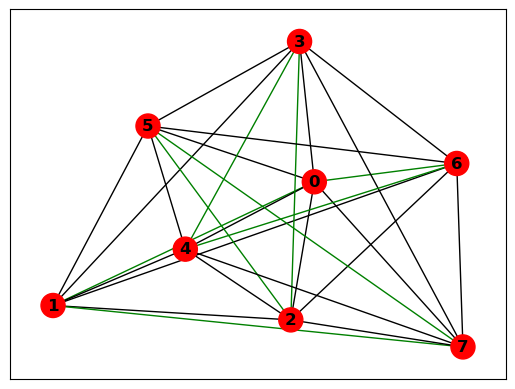

2->3->0->8->1->7->5->3->2->

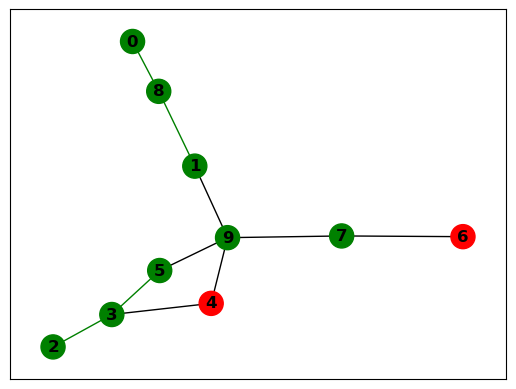

Execution time : 0.203125


In [3]:
start = time.process_time()
MinWeigth, BestPath, BestPathTimeStep = \
L1FourmiOpti( WFullGraph,
            CityTotreat,
            Evap,
            Alpha,
            Beta,
            IterationUsed,
            Deposit,
            startingVertice,
            ColonySize,
            StartValueDeposit,
            MaxTime
            )
print("The next to optimal path length is : ", MinWeigth)
print("The optimal path is : ")

PathTreated = []
OptimalPath = deque()
stepIndex = BestPathTimeStep.popleft()
for i in range(len(BestPath)-1):
    PathTreated.append((BestPath[i],BestPath[i+1],))
    PathTreated.append((BestPath[i+1],BestPath[i],))

DisplayGraph(WFullGraph[0],DisplayWeigth=False,FrontPath=PathTreated)

StartValue = BestPath.popleft()
EndValue = BestPath.popleft()
while(len(BestPath)>0):
    Equiv = copy.deepcopy(EquivArray[stepIndex][StartValue][EndValue])
    while(len(Equiv)>1):
        OptimalPath.append(Equiv.popleft())
    StartValue = EndValue
    EndValue = BestPath.popleft()
    stepIndex = BestPathTimeStep.popleft()
Equiv = copy.deepcopy(EquivArray[stepIndex][StartValue][EndValue])
while(len(Equiv)>0):
    OptimalPath.append(Equiv.popleft())
    
PathTreated = []
for i in range(len(OptimalPath)-1):
    PathTreated.append((OptimalPath[i],OptimalPath[i+1],))
    PathTreated.append((OptimalPath[i+1],OptimalPath[i],))
for i in OptimalPath:
    print(i,end="->")

DisplayGraph(WGraph[0],DisplayWeigth=False,FrontPath=PathTreated,FrontNode=ListDeliverieTreated)
print("Execution time : "+str(process_time() - start))

The next to optimal path length is :  65.04599939944757
The optimal path is : 


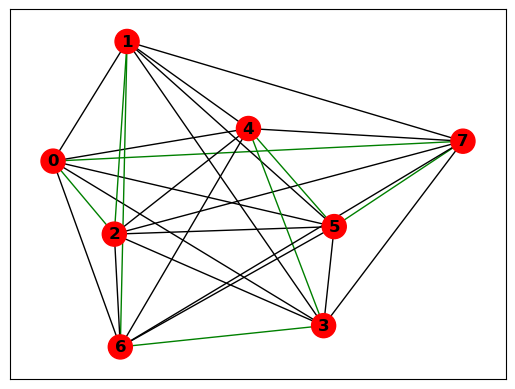

2->3->4->9->1->8->0->8->1->7->5->3->4->9->1->1->9->5->3->2->

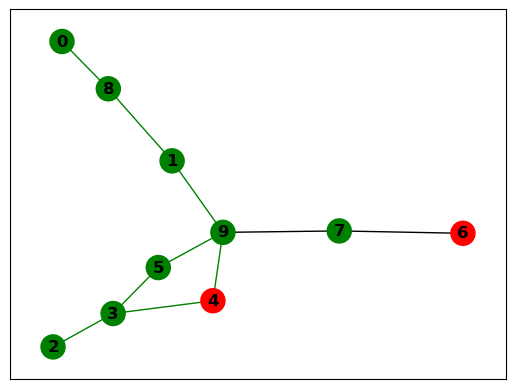

Execution time : 0.203125


In [4]:
start = time.process_time()
MinWeigth, BestPath, BestPathTimeStep = \
L2FourmiOpti( WFullGraph,
            CityTotreat,
            Evap,
            Alpha,
            Beta,
            IterationUsed,
            Deposit,
            startingVertice,
            ColonySize,
            StartValueDeposit,
            MaxTime,
            UpdatedObjectGetPoint
            )
print("The next to optimal path length is : ", MinWeigth)
print("The optimal path is : ")

PathTreated = []
OptimalPath = deque()
stepIndex = BestPathTimeStep.popleft()
for i in range(len(BestPath)-1):
    PathTreated.append((BestPath[i],BestPath[i+1],))
    PathTreated.append((BestPath[i+1],BestPath[i],))

DisplayGraph(WFullGraph[0],DisplayWeigth=False,FrontPath=PathTreated)

StartValue = BestPath.popleft()
EndValue = BestPath.popleft()
while(len(BestPath)>0):
    Equiv = copy.deepcopy(EquivArray[stepIndex][StartValue][EndValue])
    while(len(Equiv)>1):
        OptimalPath.append(Equiv.popleft())
    StartValue = EndValue
    EndValue = BestPath.popleft()
    stepIndex = BestPathTimeStep.popleft()
Equiv = copy.deepcopy(EquivArray[stepIndex][StartValue][EndValue])
while(len(Equiv)>0):
    OptimalPath.append(Equiv.popleft())
    
PathTreated = []
for i in range(len(OptimalPath)-1):
    PathTreated.append((OptimalPath[i],OptimalPath[i+1],))
    PathTreated.append((OptimalPath[i+1],OptimalPath[i],))
for i in OptimalPath:
    print(i,end="->")

DisplayGraph(WGraph[0],DisplayWeigth=False,FrontPath=PathTreated,FrontNode=ListDeliverieTreated)
print("Execution time : "+str(process_time() - start))